In [1]:
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pprint import pprint

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target Search Term
target_terms = ("@BBC", "@CBS", "@CNN",
               "@FoxNews", "@nytimes")

sentiment_list = []

for target in target_terms:
    counter = 1
    oldest_tweet = None
    
    for x in range(1,6):
        public_tweets = api.user_timeline(target,
                                          page=x,
                                          result_type="recent", 
                                          max_id=oldest_tweet)
        
        for tweet in public_tweets:

            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
                
            oldest_tweet = tweet["id"] - 1
            
            sentiment_list.append({"User": target,
                                    "Text": tweet["text"],
                                    "Date": tweet["created_at"], 
                                    "Compound": compound,
                                    "Positive": pos,
                                    "Negative": neu,
                                    "Neutral": neg,
                                    "Tweets Ago": counter})
            counter +=1

pprint(sentiment_list)

    

[{'Compound': 0.0,
  'Date': 'Sun Jul 29 20:26:13 +0000 2018',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Text': 'RT @bbcarts: Tsundoku: The art of buying books and never reading '
          'them https://t.co/nzmym0Gtsh',
  'Tweets Ago': 1,
  'User': '@BBC'},
 {'Compound': 0.0,
  'Date': 'Sun Jul 29 20:03:05 +0000 2018',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Text': 'Stacey Dooley meets a Roma girl who turned to prostitution after '
          'she was removed from her parents at 13. https://t.co/I7opQRZ6Z2',
  'Tweets Ago': 2,
  'User': '@BBC'},
 {'Compound': 0.4215,
  'Date': 'Sun Jul 29 19:02:05 +0000 2018',
  'Negative': 0.891,
  'Neutral': 0.0,
  'Positive': 0.109,
  'Text': "🇺🇸 @edballs travels to America's Deep South to immerse himself in "
          'the lives of those who put Trump in power, and le… '
          'https://t.co/2oLWounf1y',
  'Tweets Ago': 3,
  'User': '@BBC'},
 {'Compound': 0.6239,
  'Date': 'Sun Jul 29 17:29:30 +0000 2018',
 

  'Neutral': 0.0,
  'Positive': 0.0,
  'Text': 'Renowned artists Cher, Philip Glass, Reba McEntire, Wayne Shorter, '
          'and the co-creators of #Hamilton will be recogni… '
          'https://t.co/PEjjI9MKE1',
  'Tweets Ago': 3,
  'User': '@CBS'},
 {'Compound': 0.34,
  'Date': 'Wed Jul 25 01:05:03 +0000 2018',
  'Negative': 0.882,
  'Neutral': 0.0,
  'Positive': 0.118,
  'Text': "Who's excited for the return of @MurphyBrownCBS? Here's a "
          'behind-the-scenes look at the first table read of the sea… '
          'https://t.co/1B5S4WJnCW',
  'Tweets Ago': 4,
  'User': '@CBS'},
 {'Compound': -0.1511,
  'Date': 'Tue Jul 24 18:54:14 +0000 2018',
  'Negative': 0.834,
  'Neutral': 0.099,
  'Positive': 0.068,
  'Text': 'Mark your calendars because you won’t want to miss this! Former '
          'Secretaries of State @HillaryClinton, @Madeleine, a… '
          'https://t.co/JKDPp97OqN',
  'Tweets Ago': 5,
  'User': '@CBS'},
 {'Compound': 0.8293,
  'Date': 'Mon Jul 23 21:30:33 +00

  'Text': "Look out for @LukeBryanOnline's performance tonight at the 53rd "
          '#ACMawards! https://t.co/dgxgsfj5Hg',
  'Tweets Ago': 84,
  'User': '@CBS'},
 {'Compound': 0.34,
  'Date': 'Sat Apr 14 23:00:01 +0000 2018',
  'Negative': 0.893,
  'Neutral': 0.0,
  'Positive': 0.107,
  'Text': 'Are you as excited for the #ACMawards as @KelseaBallerini? This '
          'Female Vocalist Of The Year nominee is taking the s… '
          'https://t.co/JSj5jGH25H',
  'Tweets Ago': 85,
  'User': '@CBS'},
 {'Compound': 0.0,
  'Date': 'Sat Apr 14 20:26:59 +0000 2018',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Text': 'Watch @Jason_Aldean and @ThomasRhett take a break from rehearsals '
          'to spend quality time with Route 91 Survivors.… '
          'https://t.co/TiDfaYxJUm',
  'Tweets Ago': 86,
  'User': '@CBS'},
 {'Compound': 0.8402,
  'Date': 'Sat Apr 14 18:17:12 +0000 2018',
  'Negative': 0.625,
  'Neutral': 0.0,
  'Positive': 0.375,
  'Text': "Country's brightest 

          "at age 117, according to the country's Health M… "
          'https://t.co/8HH2K3BMxT',
  'Tweets Ago': 86,
  'User': '@CNN'},
 {'Compound': 0.0,
  'Date': 'Fri Jul 27 15:10:06 +0000 2018',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Text': 'How DNA and other methods are used in identifying deceased US '
          'troops https://t.co/OVeQfrrkMJ https://t.co/0QPdgUx1Y7',
  'Tweets Ago': 87,
  'User': '@CNN'},
 {'Compound': -0.5574,
  'Date': 'Fri Jul 27 15:00:11 +0000 2018',
  'Negative': 0.769,
  'Neutral': 0.231,
  'Positive': 0.0,
  'Text': '11 endangered rhinos were moved to start a new population. 10 died '
          'https://t.co/kwoA2Xp3TH https://t.co/MJf4cr2GOr',
  'Tweets Ago': 88,
  'User': '@CNN'},
 {'Compound': 0.0,
  'Date': 'Fri Jul 27 14:55:04 +0000 2018',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Text': 'Coke is raising soda prices because of aluminum tariffs '
          'https://t.co/kMEylcdg7h https://t.co/53KqdtKfq8',
  'Tw

  'Text': 'On @foxandfriends\u200b, @dbongino\u200b outlined some "new rules" '
          'for how we should talk about the economy now that… '
          'https://t.co/F1nFzvEVhX',
  'Tweets Ago': 71,
  'User': '@FoxNews'},
 {'Compound': 0.0,
  'Date': 'Sun Jul 29 04:30:00 +0000 2018',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Text': '.@dbongino: "We don\'t owe you a dime more, Captain Federal '
          'Government, not a dime." https://t.co/OxfDfq1VwF',
  'Tweets Ago': 72,
  'User': '@FoxNews'},
 {'Compound': 0.0,
  'Date': 'Sun Jul 29 04:23:00 +0000 2018',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Text': 'Indonesia earthquake results in multiple deaths, injuries '
          'https://t.co/zyHpTqezZL',
  'Tweets Ago': 73,
  'User': '@FoxNews'},
 {'Compound': -0.4522,
  'Date': 'Sun Jul 29 04:15:00 +0000 2018',
  'Negative': 0.844,
  'Neutral': 0.156,
  'Positive': 0.0,
  'Text': '.@charliekirk11: "If socialist professors really believe the '
        

In [3]:
sentiment_df = pd.DataFrame(sentiment_list).set_index("User").round(3)
sentiment_df.head()

,Compound,Date,Negative,Neutral,Positive,Text,Tweets Ago
User,,,,,,,
@BBC,0.000,Sun Jul 29 20:26:13 +0000 2018,1.000,0.000,0.000,RT @bbcarts: Tsundoku: The art of buying books...,1
@BBC,0.000,Sun Jul 29 20:03:05 +0000 2018,1.000,0.000,0.000,Stacey Dooley meets a Roma girl who turned to ...,2
@BBC,0.422,Sun Jul 29 19:02:05 +0000 2018,0.891,0.000,0.109,🇺🇸 @edballs travels to America's Deep South to...,3
@BBC,0.624,Sun Jul 29 17:29:30 +0000 2018,0.854,0.000,0.146,RT @BBCSport: Geraint Thomas has done it! 👏🏴󠁧󠁢...,4
@BBC,0.670,Sun Jul 29 17:03:03 +0000 2018,0.591,0.094,0.315,😂 A Scottish three year old's take on the summ...,5


In [4]:
sentiment_df = sentiment_df[["Text", "Date", "Compound",
                             "Positive", "Negative", "Neutral",
                            "Tweets Ago"]]
sentiment_df.head()

output_path = "sentiment_df.csv"
sentiment_df.to_csv(output_path, index=False, header=True) 

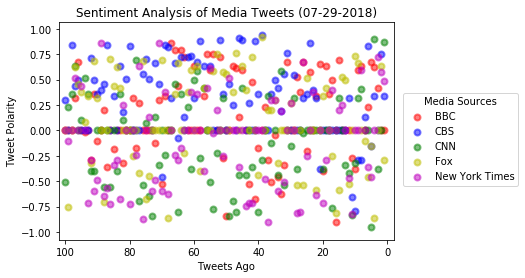

In [5]:
media_sources = ("BBC", "CBS", "CNN",
               "Fox", "New York Times")
colors = ("r", "b", "g", "y", "m")

for target in target_terms:
    
    x_vals = sentiment_df.loc[target]["Tweets Ago"]
    y_vals = sentiment_df.loc[target]["Compound"]
    plt.scatter(x_vals, y_vals,
            marker="o", color=colors[target_terms.index(target)],
            linewidth=2.0, alpha=0.5)

now = datetime.now()
now = now.strftime("%m-%d-%Y")
plt.title(f"Sentiment Analysis of Media Tweets ({now})")
plt.xlim(102,-2)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.legend(media_sources, title="Media Sources", loc=9, bbox_to_anchor=(1.2, 0.7))

plt.savefig("sentiment_scatter.png")
plt.show()

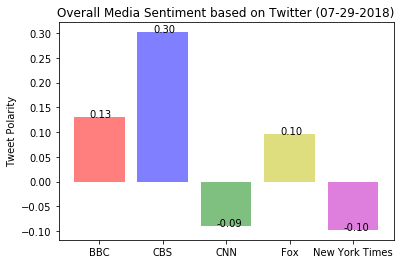

In [6]:
sentiment_means = []
x_axis = np.arange(len(target_terms))

for target in target_terms:
    mean = sentiment_df["Compound"].loc[target].mean()
    sentiment_means.append(mean)

plt.bar(x_axis, sentiment_means, color=colors, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, media_sources)

now = datetime.now()
now = now.strftime("%m-%d-%Y")
plt.title(f"Overall Media Sentiment based on Twitter ({now})")
plt.ylabel("Tweet Polarity")

formatted_sentiment_means = ["%.2f" % sentiment for sentiment in sentiment_means]
for i in range(len(x_axis)):
    plt.text(x = x_axis[i]-0.15, y = sentiment_means[i], s = formatted_sentiment_means[i], size = 10)
    
plt.tight_layout

plt.savefig("overall_sentiment_bar.png")
plt.show()

In [8]:
print("Trends")
print("---------------------------------------")
print("Trend 1:")
print("Out of the five media sources, CBS has the most positive compound score overall. Most of the individual compound scores of the last 100 tweets were positive.")
print("---------------------------------------")
print("Trend 2:")
print("CNN and New York Times have the most negative compound scores overall.")
print("---------------------------------------")
print("Trend 3:")
print("Overall, there seems to be more tweets with a positive compound score than negative. Many tweets also have a compound score of 0.")

Trends
---------------------------------------
Trend 1:
Out of the five media sources, CBS has the most positive compound score overall. Most of the individual compound scores of the last 100 tweets were positive.
---------------------------------------
Trend 2:
CNN and New York Times have the most negative compound scores overall.
---------------------------------------
Trend 3:
Overall, there seems to be more tweets with a positive compound score than negative. Many tweets also have a compound score of 0.
